[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 375, 376, 377, 378, 379, 380, 381, 382, 383, 407, 408, 409, 410, 411, 412, 413, 414, 415, 433, 434, 435, 436, 437, 438, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 607, 608, 609, 610, 611, 612, 613, 630, 631, 632, 633, 634, 635, 636, 637, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685]


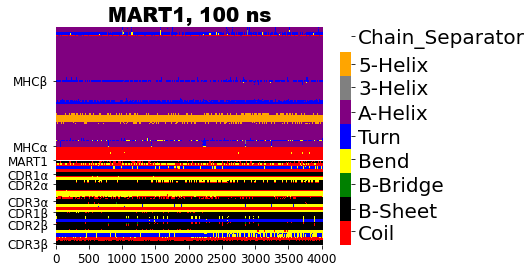

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import gromacs
from gromacs.formats import XPM

#MART1, 100ns Secondary Structure
ss = gromacs.formats.XPM("/Users/zrollins/Box/DMF5_MART1/M1+/100/ss.xpm", reverse=True)
ssmap = ss.array
ssmap2 = ssmap.astype(np.str)
ssmaps = pd.DataFrame(data=ssmap2.T)

#List of residues

r, a, an, m, b, c, d, e, f = [],[],[],[],[],[],[],[],[]
with open("/Users/zrollins/Documents/Documents/DMF5_MART1/M1/100/raw/npt.gro") as f:
    for line in f:
        if line.startswith('370433'):
            continue
        cols = line.split()
        if len(cols) == 9:
                r.append(str(cols[0]))
                an.append(str(cols[2]))


#Parse map for interface
cut= list(range(0,50))
cut1=list(range(85,137))
cut2 = list(range(179,375))
cut3=list(range(384,407))
cut4=list(range(416,433))
cut5=list(range(439,472))
cut6=list(range(483,607))
cut7=list(range(614,630))
cut8=list(range(638,674))
cut9=list(range(686,824))

print(cut)
ssmaps = ssmaps.drop(cut, axis=0)
ssmaps = ssmaps.drop(cut1, axis=0)
ssmaps = ssmaps.drop(cut2, axis=0)
ssmaps = ssmaps.drop(cut3, axis=0)
ssmaps = ssmaps.drop(cut4, axis=0)
ssmaps = ssmaps.drop(cut5, axis=0)
ssmaps = ssmaps.drop(cut6, axis=0)
ssmaps = ssmaps.drop(cut7, axis=0)
ssmaps = ssmaps.drop(cut8, axis=0)
ssmaps = ssmaps.drop(cut9, axis=0)

#Rename residues function
MHCa = list(range(137,180))
MHCb = list(range(50,86))
pep = list(range(376,385))
CDR1a = list(range(408,417))
CDR2a = list(range(434,440))
CDR3a = list(range(473,484))
CDR1b = list(range(608,615))
CDR2b = list(range(631,639))
CDR3b = list(range(675,687))
#Colormap

ssmaps = ssmaps.replace(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'],['1','2','3','4','5','6','7','8','9'])
ssmaps = ssmaps.astype(int)
cmap = colors.ListedColormap(['red','black','green','yellow', 'blue','purple','gray','orange', 'white'])
boundaries = [0,1,2,3,4,5,6,7,8,9]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
rows, cols = ssmaps.shape
#Plot
yticks=['85','179','384','416','439','483','614','638','686']
g = sns.heatmap(ssmaps, cmap=cmap)
colorbar = g.collections[0].colorbar
colorbar.set_ticks([1.5,2.3,3.25,4.15,5,5.9,6.8,7.65,8.7])
colorbar.set_ticklabels(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'])
g.set_yticks((34,76,85,94,100,111,118,126,138))
g.set_yticklabels(('MHCβ','MHCα','MART1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'),fontsize=12)
#g.set_ylabel('TCR-pMHC Interfacial Region')
g.set_xticks(list(range(0,cols,500)))
g.set_xticklabels(list(range(0,cols,500)),rotation=0,fontsize=12)
#g.set_xlabel('Time (ps)',fontname = 'Arial', fontsize=20)
g.set_title('MART1, 100 ns',fontname = 'Arial Black', fontsize=20)
print(ssmaps.index.tolist())
plt.savefig('/Users/zrollins/Box/DMF5_MART1/M1+/100/dssp_interface.png', bbox_inches='tight', dpi=300)
#plt.imshow(ssmaps, cmap=cmap, aspect='auto',interpolation='nearest')
#plt.yticks(ticks=(35,76,84,92,97,107,113,120,131), labels=('MHCβ','MHCα','MART1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 375, 376, 377, 378, 379, 380, 381, 382, 383, 407, 408, 409, 410, 411, 412, 413, 414, 415, 433, 434, 435, 436, 437, 438, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 607, 608, 609, 610, 611, 612, 613, 630, 631, 632, 633, 634, 635, 636, 637, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685]


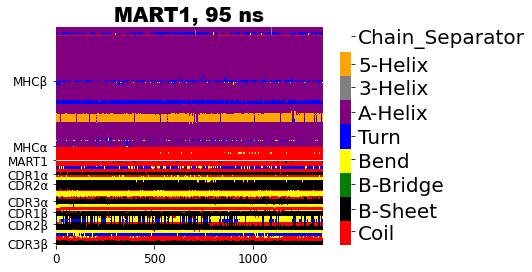

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import gromacs
from gromacs.formats import XPM

#MART1, 100ns Secondary Structure
ss = gromacs.formats.XPM("/Users/zrollins/Box/DMF5_MART1/M1+/95/ss.xpm", reverse=True)
ssmap = ss.array
ssmap2 = ssmap.astype(np.str)
ssmaps = pd.DataFrame(data=ssmap2.T)

#List of residues

r, a, an, m, b, c, d, e, f = [],[],[],[],[],[],[],[],[]
with open("/Users/zrollins/Documents/Documents/DMF5_MART1/M1/100s/raw/npt.gro") as f:
    for line in f:
        if line.startswith('370433'):
            continue
        cols = line.split()
        if len(cols) == 9:
                r.append(str(cols[0]))
                an.append(str(cols[2]))


#Parse map for interface
cut= list(range(0,50))
cut1=list(range(85,137))
cut2 = list(range(179,375))
cut3=list(range(384,407))
cut4=list(range(416,433))
cut5=list(range(439,472))
cut6=list(range(483,607))
cut7=list(range(614,630))
cut8=list(range(638,674))
cut9=list(range(686,824))

print(cut)
ssmaps = ssmaps.drop(cut, axis=0)
ssmaps = ssmaps.drop(cut1, axis=0)
ssmaps = ssmaps.drop(cut2, axis=0)
ssmaps = ssmaps.drop(cut3, axis=0)
ssmaps = ssmaps.drop(cut4, axis=0)
ssmaps = ssmaps.drop(cut5, axis=0)
ssmaps = ssmaps.drop(cut6, axis=0)
ssmaps = ssmaps.drop(cut7, axis=0)
ssmaps = ssmaps.drop(cut8, axis=0)
ssmaps = ssmaps.drop(cut9, axis=0)

#Rename residues function
MHCa = list(range(137,180))
MHCb = list(range(50,86))
pep = list(range(376,385))
CDR1a = list(range(408,417))
CDR2a = list(range(434,440))
CDR3a = list(range(473,484))
CDR1b = list(range(608,615))
CDR2b = list(range(631,639))
CDR3b = list(range(675,687))
#Colormap

ssmaps = ssmaps.replace(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'],['1','2','3','4','5','6','7','8','9'])
ssmaps = ssmaps.astype(int)
cmap = colors.ListedColormap(['red','black','green','yellow', 'blue','purple','gray','orange', 'white'])
boundaries = [0,1,2,3,4,5,6,7,8,9]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
rows, cols = ssmaps.shape
#Plot
yticks=['85','179','384','416','439','483','614','638','686']
g = sns.heatmap(ssmaps, cmap=cmap)
colorbar = g.collections[0].colorbar
colorbar.set_ticks([1.5,2.3,3.25,4.15,5,5.9,6.8,7.65,8.7])
colorbar.set_ticklabels(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'])
g.set_yticks((34,76,85,94,100,111,118,126,138))
g.set_yticklabels(('MHCβ','MHCα','MART1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'),fontsize=12)
#g.set_ylabel('TCR-pMHC Interfacial Region')
g.set_xticks(list(range(0,cols,500)))
g.set_xticklabels(list(range(0,cols,500)),rotation=0,fontsize=12)
#g.set_xlabel('Time (ps)')
g.set_title('MART1, 95 ns',fontname = 'Arial Black', fontsize=20)
print(ssmaps.index.tolist())
plt.savefig('/Users/zrollins/Box/DMF5_MART1/M1+/95/dssp_interface.png', bbox_inches='tight', dpi=300)
#plt.imshow(ssmaps, cmap=cmap, aspect='auto',interpolation='nearest')
#plt.yticks(ticks=(35,76,84,92,97,107,113,120,131), labels=('MHCβ','MHCα','MART1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 375, 376, 377, 378, 379, 380, 381, 382, 383, 407, 408, 409, 410, 411, 412, 413, 414, 415, 433, 434, 435, 436, 437, 438, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 607, 608, 609, 610, 611, 612, 613, 630, 631, 632, 633, 634, 635, 636, 637, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685]


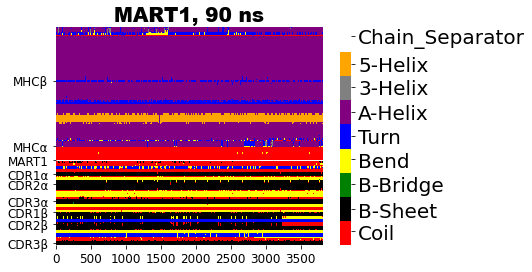

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import gromacs
from gromacs.formats import XPM

#MART1, 100ns Secondary Structure
ss = gromacs.formats.XPM("/Users/zrollins/Box/DMF5_MART1/M1+/90/ss.xpm", reverse=True)
ssmap = ss.array
ssmap2 = ssmap.astype(np.str)
ssmaps = pd.DataFrame(data=ssmap2.T)

#List of residues

r, a, an, m, b, c, d, e, f = [],[],[],[],[],[],[],[],[]
with open("/Users/zrollins/Documents/Documents/DMF5_MART1/M1/100/raw/npt.gro") as f:
    for line in f:
        if line.startswith('370433'):
            continue
        cols = line.split()
        if len(cols) == 9:
                r.append(str(cols[0]))
                an.append(str(cols[2]))


#Parse map for interface
cut= list(range(0,50))
cut1=list(range(85,137))
cut2 = list(range(179,375))
cut3=list(range(384,407))
cut4=list(range(416,433))
cut5=list(range(439,472))
cut6=list(range(483,607))
cut7=list(range(614,630))
cut8=list(range(638,674))
cut9=list(range(686,824))

print(cut)
ssmaps = ssmaps.drop(cut, axis=0)
ssmaps = ssmaps.drop(cut1, axis=0)
ssmaps = ssmaps.drop(cut2, axis=0)
ssmaps = ssmaps.drop(cut3, axis=0)
ssmaps = ssmaps.drop(cut4, axis=0)
ssmaps = ssmaps.drop(cut5, axis=0)
ssmaps = ssmaps.drop(cut6, axis=0)
ssmaps = ssmaps.drop(cut7, axis=0)
ssmaps = ssmaps.drop(cut8, axis=0)
ssmaps = ssmaps.drop(cut9, axis=0)

#Rename residues function
MHCa = list(range(137,180))
MHCb = list(range(50,86))
pep = list(range(376,385))
CDR1a = list(range(408,417))
CDR2a = list(range(434,440))
CDR3a = list(range(473,484))
CDR1b = list(range(608,615))
CDR2b = list(range(631,639))
CDR3b = list(range(675,687))
#Colormap

ssmaps = ssmaps.replace(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'],['1','2','3','4','5','6','7','8','9'])
ssmaps = ssmaps.astype(int)
cmap = colors.ListedColormap(['red','black','green','yellow', 'blue','purple','gray','orange', 'white'])
boundaries = [0,1,2,3,4,5,6,7,8,9]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
rows, cols = ssmaps.shape
#Plot
yticks=['85','179','384','416','439','483','614','638','686']
g = sns.heatmap(ssmaps, cmap=cmap)
colorbar = g.collections[0].colorbar
colorbar.set_ticks([1.5,2.3,3.25,4.15,5,5.9,6.8,7.65,8.7])
colorbar.set_ticklabels(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'])
g.set_yticks((34,76,85,94,100,111,118,126,138))
g.set_yticklabels(('MHCβ','MHCα','MART1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'),fontsize=12)
#g.set_ylabel('TCR-pMHC Interfacial Region')
g.set_xticks(list(range(0,cols,500)))
g.set_xticklabels(list(range(0,cols,500)),rotation=0,fontsize=12)
#g.set_xlabel('Time (ps)')
g.set_title('MART1, 90 ns',fontname = 'Arial Black', fontsize=20)
print(ssmaps.index.tolist())
plt.savefig('/Users/zrollins/Box/DMF5_MART1/M1+/90/dssp_interface.png', bbox_inches='tight', dpi=300)
#plt.imshow(ssmaps, cmap=cmap, aspect='auto',interpolation='nearest')
#plt.yticks(ticks=(35,76,84,92,97,107,113,120,131), labels=('MHCβ','MHCα','MART1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 375, 376, 377, 378, 379, 380, 381, 382, 383, 407, 408, 409, 410, 411, 412, 413, 414, 415, 433, 434, 435, 436, 437, 438, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 607, 608, 609, 610, 611, 612, 613, 630, 631, 632, 633, 634, 635, 636, 637, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685]


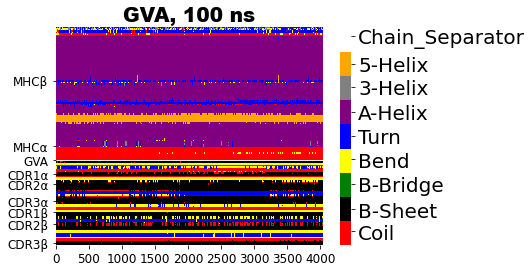

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import gromacs
from gromacs.formats import XPM

#MART1, 100ns Secondary Structure
ss = gromacs.formats.XPM("/Users/zrollins/Box/DMF5_MART1/GVA+/100/ss.xpm", reverse=True)
ssmap = ss.array
ssmap2 = ssmap.astype(np.str)
ssmaps = pd.DataFrame(data=ssmap2.T)

#List of residues 

r, a, an, m, b, c, d, e, f = [],[],[],[],[],[],[],[],[]
with open("/Users/zrollins/Documents/Documents/DMF5_MART1/M1/100/raw/npt.gro") as f:
    for line in f:
        if line.startswith('370433'):
            continue
        cols = line.split()
        if len(cols) == 9:
                r.append(str(cols[0]))
                an.append(str(cols[2]))


#Parse map for interface
cut= list(range(0,50))
cut1=list(range(85,137))
cut2 = list(range(179,375))
cut3=list(range(384,407))
cut4=list(range(416,433))
cut5=list(range(439,472))
cut6=list(range(483,607))
cut7=list(range(614,630))
cut8=list(range(638,674))
cut9=list(range(686,824))

print(cut)
ssmaps = ssmaps.drop(cut, axis=0)
ssmaps = ssmaps.drop(cut1, axis=0)
ssmaps = ssmaps.drop(cut2, axis=0)
ssmaps = ssmaps.drop(cut3, axis=0)
ssmaps = ssmaps.drop(cut4, axis=0)
ssmaps = ssmaps.drop(cut5, axis=0)
ssmaps = ssmaps.drop(cut6, axis=0)
ssmaps = ssmaps.drop(cut7, axis=0)
ssmaps = ssmaps.drop(cut8, axis=0)
ssmaps = ssmaps.drop(cut9, axis=0)

#Rename residues function
MHCa = list(range(137,180))
MHCb = list(range(50,86))
pep = list(range(376,385))
CDR1a = list(range(408,417))
CDR2a = list(range(434,440))
CDR3a = list(range(473,484))
CDR1b = list(range(608,615))
CDR2b = list(range(631,639))
CDR3b = list(range(675,687))
#Colormap

ssmaps = ssmaps.replace(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'],['1','2','3','4','5','6','7','8','9'])
ssmaps = ssmaps.astype(int)
cmap = colors.ListedColormap(['red','black','green','yellow', 'blue','purple','gray','orange', 'white'])
boundaries = [0,1,2,3,4,5,6,7,8,9]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
rows, cols = ssmaps.shape
#Plot
yticks=['85','179','384','416','439','483','614','638','686']
g = sns.heatmap(ssmaps, cmap=cmap)
colorbar = g.collections[0].colorbar
colorbar.set_ticks([1.5,2.3,3.25,4.15,5,5.9,6.8,7.65,8.7])
colorbar.set_ticklabels(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'])
g.set_yticks((34,76,85,94,100,111,118,126,138))
g.set_yticklabels(('MHCβ','MHCα','GVA','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'),fontsize=12)
#g.set_ylabel('TCR-pMHC Interfacial Region')
g.set_xticks(list(range(0,cols,500)))
g.set_xticklabels(list(range(0,cols,500)),rotation=0,fontsize=12)
#g.set_xlabel('Time (ps)')
g.set_title('GVA, 100 ns',fontname = 'Arial Black', fontsize=20)
print(ssmaps.index.tolist())
plt.savefig('/Users/zrollins/Box/DMF5_MART1/GVA+/100/dssp_interface.png', bbox_inches='tight', dpi=300)
#plt.imshow(ssmaps, cmap=cmap, aspect='auto',interpolation='nearest')
#plt.yticks(ticks=(35,76,84,92,97,107,113,120,131), labels=('MHCβ','MHCα','MART1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 375, 376, 377, 378, 379, 380, 381, 382, 383, 407, 408, 409, 410, 411, 412, 413, 414, 415, 433, 434, 435, 436, 437, 438, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 607, 608, 609, 610, 611, 612, 613, 630, 631, 632, 633, 634, 635, 636, 637, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685]


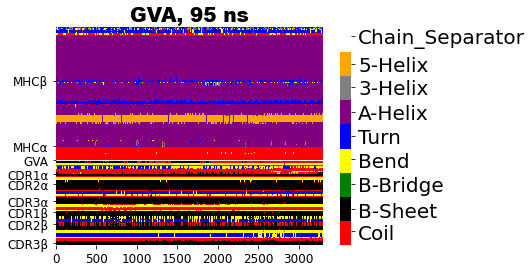

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import gromacs
from gromacs.formats import XPM

#MART1, 100ns Secondary Structure
ss = gromacs.formats.XPM("/Users/zrollins/Box/DMF5_MART1/GVA+/95/ss.xpm", reverse=True)
ssmap = ss.array
ssmap2 = ssmap.astype(np.str)
ssmaps = pd.DataFrame(data=ssmap2.T)

#List of residues 

r, a, an, m, b, c, d, e, f = [],[],[],[],[],[],[],[],[]
with open("/Users/zrollins/Documents/Documents/DMF5_MART1/M1/100/raw/npt.gro") as f:
    for line in f:
        if line.startswith('370433'):
            continue
        cols = line.split()
        if len(cols) == 9:
                r.append(str(cols[0]))
                an.append(str(cols[2]))


#Parse map for interface
cut= list(range(0,50))
cut1=list(range(85,137))
cut2 = list(range(179,375))
cut3=list(range(384,407))
cut4=list(range(416,433))
cut5=list(range(439,472))
cut6=list(range(483,607))
cut7=list(range(614,630))
cut8=list(range(638,674))
cut9=list(range(686,824))

print(cut)
ssmaps = ssmaps.drop(cut, axis=0)
ssmaps = ssmaps.drop(cut1, axis=0)
ssmaps = ssmaps.drop(cut2, axis=0)
ssmaps = ssmaps.drop(cut3, axis=0)
ssmaps = ssmaps.drop(cut4, axis=0)
ssmaps = ssmaps.drop(cut5, axis=0)
ssmaps = ssmaps.drop(cut6, axis=0)
ssmaps = ssmaps.drop(cut7, axis=0)
ssmaps = ssmaps.drop(cut8, axis=0)
ssmaps = ssmaps.drop(cut9, axis=0)

#Rename residues function
MHCa = list(range(137,180))
MHCb = list(range(50,86))
pep = list(range(376,385))
CDR1a = list(range(408,417))
CDR2a = list(range(434,440))
CDR3a = list(range(473,484))
CDR1b = list(range(608,615))
CDR2b = list(range(631,639))
CDR3b = list(range(675,687))
#Colormap

ssmaps = ssmaps.replace(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'],['1','2','3','4','5','6','7','8','9'])
ssmaps = ssmaps.astype(int)
cmap = colors.ListedColormap(['red','black','green','yellow', 'blue','purple','gray','orange', 'white'])
boundaries = [0,1,2,3,4,5,6,7,8,9]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
rows, cols = ssmaps.shape
#Plot
yticks=['85','179','384','416','439','483','614','638','686']
g = sns.heatmap(ssmaps, cmap=cmap)
colorbar = g.collections[0].colorbar
colorbar.set_ticks([1.5,2.3,3.25,4.15,5,5.9,6.8,7.65,8.7])
colorbar.set_ticklabels(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'])
g.set_yticks((34,76,85,94,100,111,118,126,138))
g.set_yticklabels(('MHCβ','MHCα','GVA','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'),fontsize=12)
#g.set_ylabel('TCR-pMHC Interfacial Region')
g.set_xticks(list(range(0,cols,500)))
g.set_xticklabels(list(range(0,cols,500)),rotation=0,fontsize=12)
#g.set_xlabel('Time (ps)')
g.set_title('GVA, 95 ns',fontname = 'Arial Black', fontsize=20)
print(ssmaps.index.tolist())
plt.savefig('/Users/zrollins/Box/DMF5_MART1/GVA+/95/dssp_interface.png', bbox_inches='tight', dpi=300)
#plt.imshow(ssmaps, cmap=cmap, aspect='auto',interpolation='nearest')
#plt.yticks(ticks=(35,76,84,92,97,107,113,120,131), labels=('MHCβ','MHCα','MART1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 375, 376, 377, 378, 379, 380, 381, 382, 383, 407, 408, 409, 410, 411, 412, 413, 414, 415, 433, 434, 435, 436, 437, 438, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 607, 608, 609, 610, 611, 612, 613, 630, 631, 632, 633, 634, 635, 636, 637, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685]


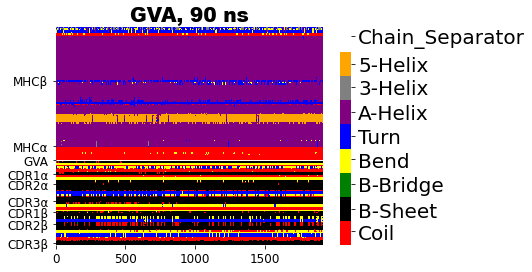

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import gromacs
from gromacs.formats import XPM

#MART1, 100ns Secondary Structure
ss = gromacs.formats.XPM("/Users/zrollins/Box/DMF5_MART1/GVA+/90/ss.xpm", reverse=True)
ssmap = ss.array
ssmap2 = ssmap.astype(np.str)
ssmaps = pd.DataFrame(data=ssmap2.T)

#List of residues 

r, a, an, m, b, c, d, e, f = [],[],[],[],[],[],[],[],[]
with open("/Users/zrollins/Documents/Documents/DMF5_MART1/M1/100/raw/npt.gro") as f:
    for line in f:
        if line.startswith('370433'):
            continue
        cols = line.split()
        if len(cols) == 9:
                r.append(str(cols[0]))
                an.append(str(cols[2]))


#Parse map for interface
cut= list(range(0,50))
cut1=list(range(85,137))
cut2 = list(range(179,375))
cut3=list(range(384,407))
cut4=list(range(416,433))
cut5=list(range(439,472))
cut6=list(range(483,607))
cut7=list(range(614,630))
cut8=list(range(638,674))
cut9=list(range(686,824))

print(cut)
ssmaps = ssmaps.drop(cut, axis=0)
ssmaps = ssmaps.drop(cut1, axis=0)
ssmaps = ssmaps.drop(cut2, axis=0)
ssmaps = ssmaps.drop(cut3, axis=0)
ssmaps = ssmaps.drop(cut4, axis=0)
ssmaps = ssmaps.drop(cut5, axis=0)
ssmaps = ssmaps.drop(cut6, axis=0)
ssmaps = ssmaps.drop(cut7, axis=0)
ssmaps = ssmaps.drop(cut8, axis=0)
ssmaps = ssmaps.drop(cut9, axis=0)

#Rename residues function
MHCa = list(range(137,180))
MHCb = list(range(50,86))
pep = list(range(376,385))
CDR1a = list(range(408,417))
CDR2a = list(range(434,440))
CDR3a = list(range(473,484))
CDR1b = list(range(608,615))
CDR2b = list(range(631,639))
CDR3b = list(range(675,687))
#Colormap

ssmaps = ssmaps.replace(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'],['1','2','3','4','5','6','7','8','9'])
ssmaps = ssmaps.astype(int)
cmap = colors.ListedColormap(['red','black','green','yellow', 'blue','purple','gray','orange', 'white'])
boundaries = [0,1,2,3,4,5,6,7,8,9]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
rows, cols = ssmaps.shape
#Plot
yticks=['85','179','384','416','439','483','614','638','686']
g = sns.heatmap(ssmaps, cmap=cmap)
colorbar = g.collections[0].colorbar
colorbar.set_ticks([1.5,2.3,3.25,4.15,5,5.9,6.8,7.65,8.7])
colorbar.set_ticklabels(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'])
g.set_yticks((34,76,85,94,100,111,118,126,138))
g.set_yticklabels(('MHCβ','MHCα','GVA','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'),fontsize=12)
#g.set_ylabel('TCR-pMHC Interfacial Region')
g.set_xticks(list(range(0,cols,500)))
g.set_xticklabels(list(range(0,cols,500)),rotation=0,fontsize=12)
#g.set_xlabel('Time (ps)')
g.set_title('GVA, 90 ns',fontname = 'Arial Black', fontsize=20)
print(ssmaps.index.tolist())
plt.savefig('/Users/zrollins/Box/DMF5_MART1/GVA+/90/dssp_interface.png', bbox_inches='tight', dpi=300)
#plt.imshow(ssmaps, cmap=cmap, aspect='auto',interpolation='nearest')
#plt.yticks(ticks=(35,76,84,92,97,107,113,120,131), labels=('MHCβ','MHCα','MART1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 375, 376, 377, 378, 379, 380, 381, 382, 383, 407, 408, 409, 410, 411, 412, 413, 414, 415, 433, 434, 435, 436, 437, 438, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 607, 608, 609, 610, 611, 612, 613, 630, 631, 632, 633, 634, 635, 636, 637, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685]


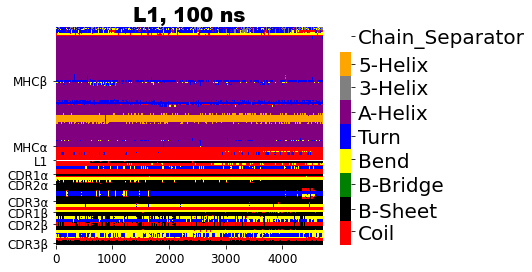

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import gromacs
from gromacs.formats import XPM

#MART1, 100ns Secondary Structure
ss = gromacs.formats.XPM("/Users/zrollins/Box/DMF5_MART1/L1+/100/ss.xpm", reverse=True)
ssmap = ss.array
ssmap2 = ssmap.astype(np.str)
ssmaps = pd.DataFrame(data=ssmap2.T)

#List of residues 

r, a, an, m, b, c, d, e, f = [],[],[],[],[],[],[],[],[]
with open("/Users/zrollins/Documents/Documents/DMF5_MART1/M1/100/raw/npt.gro") as f:
    for line in f:
        if line.startswith('370433'):
            continue
        cols = line.split()
        if len(cols) == 9:
                r.append(str(cols[0]))
                an.append(str(cols[2]))


#Parse map for interface
cut= list(range(0,50))
cut1=list(range(85,137))
cut2 = list(range(179,375))
cut3=list(range(384,407))
cut4=list(range(416,433))
cut5=list(range(439,472))
cut6=list(range(483,607))
cut7=list(range(614,630))
cut8=list(range(638,674))
cut9=list(range(686,824))

print(cut)
ssmaps = ssmaps.drop(cut, axis=0)
ssmaps = ssmaps.drop(cut1, axis=0)
ssmaps = ssmaps.drop(cut2, axis=0)
ssmaps = ssmaps.drop(cut3, axis=0)
ssmaps = ssmaps.drop(cut4, axis=0)
ssmaps = ssmaps.drop(cut5, axis=0)
ssmaps = ssmaps.drop(cut6, axis=0)
ssmaps = ssmaps.drop(cut7, axis=0)
ssmaps = ssmaps.drop(cut8, axis=0)
ssmaps = ssmaps.drop(cut9, axis=0)

#Rename residues function
MHCa = list(range(137,180))
MHCb = list(range(50,86))
pep = list(range(376,385))
CDR1a = list(range(408,417))
CDR2a = list(range(434,440))
CDR3a = list(range(473,484))
CDR1b = list(range(608,615))
CDR2b = list(range(631,639))
CDR3b = list(range(675,687))
#Colormap

ssmaps = ssmaps.replace(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'],['1','2','3','4','5','6','7','8','9'])
ssmaps = ssmaps.astype(int)
cmap = colors.ListedColormap(['red','black','green','yellow', 'blue','purple','gray','orange', 'white'])
boundaries = [0,1,2,3,4,5,6,7,8,9]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
rows, cols = ssmaps.shape
#Plot
yticks=['85','179','384','416','439','483','614','638','686']
g = sns.heatmap(ssmaps, cmap=cmap)
colorbar = g.collections[0].colorbar
colorbar.set_ticks([1.5,2.3,3.25,4.15,5,5.9,6.8,7.65,8.7])
colorbar.set_ticklabels(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'])
g.set_yticks((34,76,85,94,100,111,118,126,138))
g.set_yticklabels(('MHCβ','MHCα','L1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'),fontsize=12)
#g.set_ylabel('TCR-pMHC Interfacial Region')
g.set_xticks(list(range(0,cols,1000)))
g.set_xticklabels(list(range(0,cols,1000)),rotation=0,fontsize=12)
#g.set_xlabel('Time (ps)')
g.set_title('L1, 100 ns',fontname = 'Arial Black', fontsize=20)
print(ssmaps.index.tolist())
plt.savefig('/Users/zrollins/Box/DMF5_MART1/L1+/100/dssp_interface.png', bbox_inches='tight', dpi=300)
#plt.imshow(ssmaps, cmap=cmap, aspect='auto',interpolation='nearest')
#plt.yticks(ticks=(35,76,84,92,97,107,113,120,131), labels=('MHCβ','MHCα','MART1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 375, 376, 377, 378, 379, 380, 381, 382, 383, 407, 408, 409, 410, 411, 412, 413, 414, 415, 433, 434, 435, 436, 437, 438, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 607, 608, 609, 610, 611, 612, 613, 630, 631, 632, 633, 634, 635, 636, 637, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685]


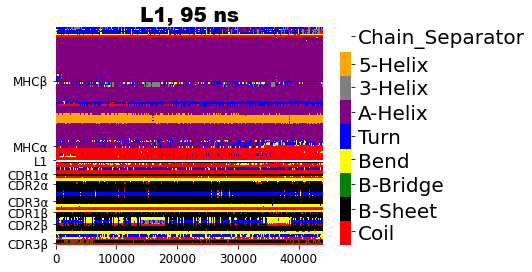

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import gromacs
from gromacs.formats import XPM

#MART1, 100ns Secondary Structure
ss = gromacs.formats.XPM("/Users/zrollins/Box/DMF5_MART1/L1+/95/ss.xpm", reverse=True)
ssmap = ss.array
ssmap2 = ssmap.astype(np.str)
ssmaps = pd.DataFrame(data=ssmap2.T)

#List of residues 

r, a, an, m, b, c, d, e, f = [],[],[],[],[],[],[],[],[]
with open("/Users/zrollins/Documents/Documents/DMF5_MART1/M1/100/raw/npt.gro") as f:
    for line in f:
        if line.startswith('370433'):
            continue
        cols = line.split()
        if len(cols) == 9:
                r.append(str(cols[0]))
                an.append(str(cols[2]))


#Parse map for interface
cut= list(range(0,50))
cut1=list(range(85,137))
cut2 = list(range(179,375))
cut3=list(range(384,407))
cut4=list(range(416,433))
cut5=list(range(439,472))
cut6=list(range(483,607))
cut7=list(range(614,630))
cut8=list(range(638,674))
cut9=list(range(686,824))

print(cut)
ssmaps = ssmaps.drop(cut, axis=0)
ssmaps = ssmaps.drop(cut1, axis=0)
ssmaps = ssmaps.drop(cut2, axis=0)
ssmaps = ssmaps.drop(cut3, axis=0)
ssmaps = ssmaps.drop(cut4, axis=0)
ssmaps = ssmaps.drop(cut5, axis=0)
ssmaps = ssmaps.drop(cut6, axis=0)
ssmaps = ssmaps.drop(cut7, axis=0)
ssmaps = ssmaps.drop(cut8, axis=0)
ssmaps = ssmaps.drop(cut9, axis=0)

#Rename residues function
MHCa = list(range(137,180))
MHCb = list(range(50,86))
pep = list(range(376,385))
CDR1a = list(range(408,417))
CDR2a = list(range(434,440))
CDR3a = list(range(473,484))
CDR1b = list(range(608,615))
CDR2b = list(range(631,639))
CDR3b = list(range(675,687))
#Colormap

ssmaps = ssmaps.replace(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'],['1','2','3','4','5','6','7','8','9'])
ssmaps = ssmaps.astype(int)
cmap = colors.ListedColormap(['red','black','green','yellow', 'blue','purple','gray','orange', 'white'])
boundaries = [0,1,2,3,4,5,6,7,8,9]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
rows, cols = ssmaps.shape
#Plot
yticks=['85','179','384','416','439','483','614','638','686']
g = sns.heatmap(ssmaps, cmap=cmap)
colorbar = g.collections[0].colorbar
colorbar.set_ticks([1.5,2.3,3.25,4.15,5,5.9,6.8,7.65,8.7])
colorbar.set_ticklabels(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'])
g.set_yticks((34,76,85,94,100,111,118,126,138))
g.set_yticklabels(('MHCβ','MHCα','L1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'),fontsize=12)
#g.set_ylabel('TCR-pMHC Interfacial Region')
g.set_xticks(list(range(0,cols,10000)))
g.set_xticklabels(list(range(0,cols,10000)),rotation=0,fontsize=12)
#g.set_xlabel('Time (ps)')
g.set_title('L1, 95 ns',fontname = 'Arial Black', fontsize=20)
print(ssmaps.index.tolist())
plt.savefig('/Users/zrollins/Box/DMF5_MART1/L1+/95/dssp_interface.png', bbox_inches='tight', dpi=300)
#plt.imshow(ssmaps, cmap=cmap, aspect='auto',interpolation='nearest')
#plt.yticks(ticks=(35,76,84,92,97,107,113,120,131), labels=('MHCβ','MHCα','MART1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 375, 376, 377, 378, 379, 380, 381, 382, 383, 407, 408, 409, 410, 411, 412, 413, 414, 415, 433, 434, 435, 436, 437, 438, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 607, 608, 609, 610, 611, 612, 613, 630, 631, 632, 633, 634, 635, 636, 637, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685]


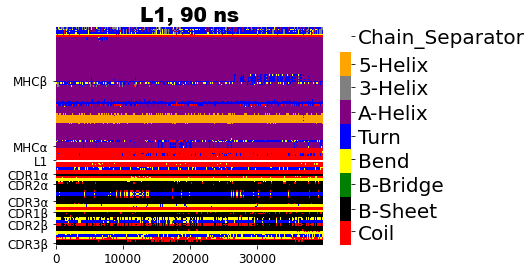

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import gromacs
from gromacs.formats import XPM

#MART1, 100ns Secondary Structure
ss = gromacs.formats.XPM("/Users/zrollins/Box/DMF5_MART1/L1+/90/ss.xpm", reverse=True)
ssmap = ss.array
ssmap2 = ssmap.astype(np.str)
ssmaps = pd.DataFrame(data=ssmap2.T)

#List of residues 

r, a, an, m, b, c, d, e, f = [],[],[],[],[],[],[],[],[]
with open("/Users/zrollins/Documents/Documents/DMF5_MART1/M1/100/raw/npt.gro") as f:
    for line in f:
        if line.startswith('370433'):
            continue
        cols = line.split()
        if len(cols) == 9:
                r.append(str(cols[0]))
                an.append(str(cols[2]))


#Parse map for interface
cut= list(range(0,50))
cut1=list(range(85,137))
cut2 = list(range(179,375))
cut3=list(range(384,407))
cut4=list(range(416,433))
cut5=list(range(439,472))
cut6=list(range(483,607))
cut7=list(range(614,630))
cut8=list(range(638,674))
cut9=list(range(686,824))

print(cut)
ssmaps = ssmaps.drop(cut, axis=0)
ssmaps = ssmaps.drop(cut1, axis=0)
ssmaps = ssmaps.drop(cut2, axis=0)
ssmaps = ssmaps.drop(cut3, axis=0)
ssmaps = ssmaps.drop(cut4, axis=0)
ssmaps = ssmaps.drop(cut5, axis=0)
ssmaps = ssmaps.drop(cut6, axis=0)
ssmaps = ssmaps.drop(cut7, axis=0)
ssmaps = ssmaps.drop(cut8, axis=0)
ssmaps = ssmaps.drop(cut9, axis=0)

#Rename residues function
MHCa = list(range(137,180))
MHCb = list(range(50,86))
pep = list(range(376,385))
CDR1a = list(range(408,417))
CDR2a = list(range(434,440))
CDR3a = list(range(473,484))
CDR1b = list(range(608,615))
CDR2b = list(range(631,639))
CDR3b = list(range(675,687))
#Colormap

ssmaps = ssmaps.replace(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'],['1','2','3','4','5','6','7','8','9'])
ssmaps = ssmaps.astype(int)
cmap = colors.ListedColormap(['red','black','green','yellow', 'blue','purple','gray','orange', 'white'])
boundaries = [0,1,2,3,4,5,6,7,8,9]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
rows, cols = ssmaps.shape
#Plot
yticks=['85','179','384','416','439','483','614','638','686']
g = sns.heatmap(ssmaps, cmap=cmap)
colorbar = g.collections[0].colorbar
colorbar.set_ticks([1.5,2.3,3.25,4.15,5,5.9,6.8,7.65,8.7])
colorbar.set_ticklabels(['Coil','B-Sheet','B-Bridge','Bend','Turn','A-Helix','3-Helix','5-Helix','Chain_Separator'])
g.set_yticks((34,76,85,94,100,111,118,126,138))
g.set_yticklabels(('MHCβ','MHCα','L1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'),fontsize=12)
#g.set_ylabel('TCR-pMHC Interfacial Region')
g.set_xticks(list(range(0,cols,10000)))
g.set_xticklabels(list(range(0,cols,10000)),rotation=0,fontsize=12)
#g.set_xlabel('Time (ps)')
g.set_title('L1, 90 ns',fontname = 'Arial Black', fontsize=20)
print(ssmaps.index.tolist())
plt.savefig('/Users/zrollins/Box/DMF5_MART1/L1+/90/dssp_interface.png', bbox_inches='tight', dpi=300)
#plt.imshow(ssmaps, cmap=cmap, aspect='auto',interpolation='nearest')
#plt.yticks(ticks=(35,76,84,92,97,107,113,120,131), labels=('MHCβ','MHCα','MART1','CDR1α','CDR2α','CDR3α','CDR1β','CDR2β','CDR3β'))
